In [12]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator,  load_img
from PIL import Image
from glob import glob

In [7]:
train_dir = r'G:\My Drive\ColabNotebooks\rps'
test_dir = r'G:\My Drive\ColabNotebooks\rps-test-set'

len(os.listdir(os.path.join(train_dir, 'rps\paper')))

840

In [17]:
for folder in os.listdir(train_dir + '/rps'):
    files = glob(pathname= str( train_dir + '/rps/' + folder + '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 840 in folder scissors
For training data , found 840 in folder rock
For training data , found 840 in folder paper


In [19]:
for folder in os.listdir(test_dir + '/rps-test-set'):
    files = glob(pathname= str( test_dir + '/rps-test-set/' + folder + '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 124 in folder scissors
For training data , found 124 in folder rock
For training data , found 124 in folder paper


In [23]:
size = []
for folder in os.listdir(train_dir + '/rps'): 
    files = glob(pathname= str( train_dir + '/rps/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(300, 300, 4)    2520
dtype: int64

In [22]:
size = []
for folder in os.listdir(test_dir + '/rps-test-set'): 
    files = glob(pathname= str(test_dir + '/rps-test-set/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(300, 300, 4)    372
dtype: int64

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(data_tr_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 2520 images belonging to 3 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(data_ts_dir,
                                                             target_size = (150, 150),
                                                             batch_size = 32,
                                                             class_mode = 'categorical',
                                                             shuffle = True)

Found 372 images belonging to 3 classes.


In [8]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : paper
1 : rock
2 : scissors


In [9]:
labels

{0: 'paper', 1: 'rock', 2: 'scissors'}

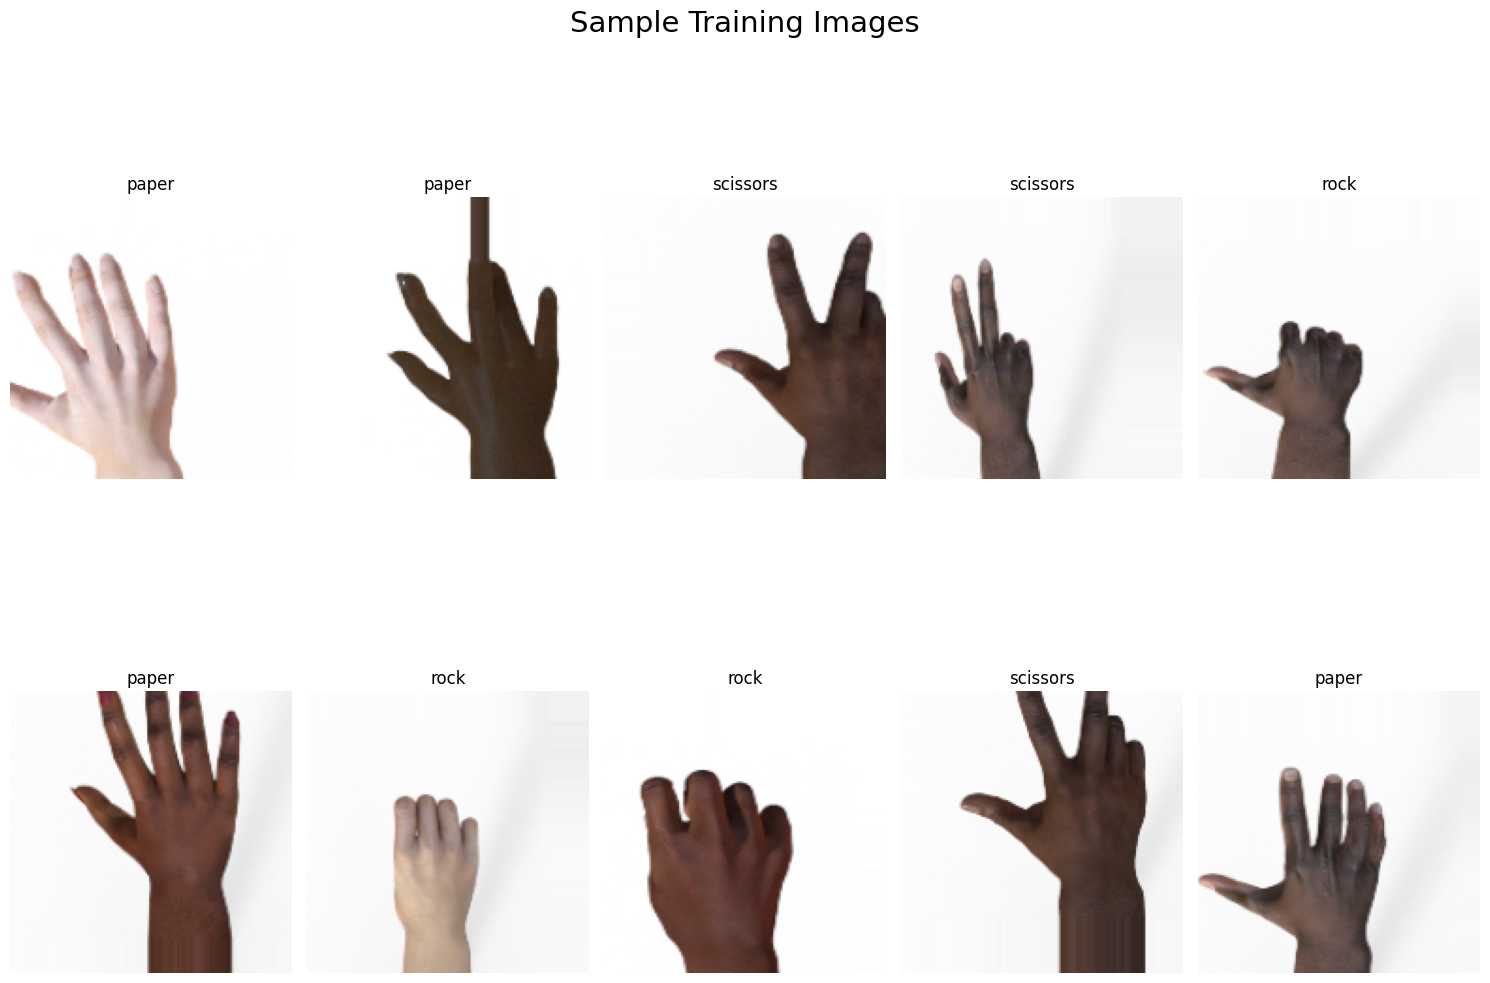

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

## Training a CNN Model

Since the training dataset is ready let's create a simple CNN Model to train on the image datasets

In [11]:
def create_model():

    model = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
            MaxPooling2D(2, 2),

            Conv2D(64, (3,3), activation='relu'),
            MaxPooling2D(2,2),

            Conv2D(128, (3,3), activation='relu'),
            MaxPooling2D(2,2),

            Conv2D(128, (3,3), activation='relu'),
            MaxPooling2D(2,2),

            Flatten(),
            Dense(512, activation='relu'),

            Dense(3, activation='softmax')])

    return model

cnn_model = create_model()


In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
optimizer  = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=2, restore_best_weights=True, patience=3, mode='max')
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, mil_lr=0.0001)

In [14]:
history = cnn_model.fit(train_generator, epochs=10, validation_data = validation_generator,
                       verbose=2,)
                       #callbacks=[reduce_lr, early_stop])

Epoch 1/10
79/79 - 397s - loss: 1.0155 - accuracy: 0.4802 - val_loss: 0.8334 - val_accuracy: 0.5806 - 397s/epoch - 5s/step
Epoch 2/10
79/79 - 29s - loss: 0.6751 - accuracy: 0.7353 - val_loss: 0.3753 - val_accuracy: 0.8333 - 29s/epoch - 371ms/step
Epoch 3/10
79/79 - 28s - loss: 0.3320 - accuracy: 0.9071 - val_loss: 0.1665 - val_accuracy: 0.9462 - 28s/epoch - 352ms/step
Epoch 4/10
79/79 - 28s - loss: 0.2289 - accuracy: 0.9306 - val_loss: 0.2405 - val_accuracy: 0.9220 - 28s/epoch - 351ms/step
Epoch 5/10
79/79 - 28s - loss: 0.1602 - accuracy: 0.9540 - val_loss: 0.1109 - val_accuracy: 0.9704 - 28s/epoch - 350ms/step
Epoch 6/10
79/79 - 28s - loss: 0.1463 - accuracy: 0.9516 - val_loss: 0.3065 - val_accuracy: 0.8656 - 28s/epoch - 352ms/step
Epoch 7/10
79/79 - 28s - loss: 0.1152 - accuracy: 0.9667 - val_loss: 0.0899 - val_accuracy: 0.9677 - 28s/epoch - 349ms/step
Epoch 8/10
79/79 - 28s - loss: 0.0987 - accuracy: 0.9718 - val_loss: 0.0474 - val_accuracy: 1.0000 - 28s/epoch - 354ms/step
Epoch 9/1

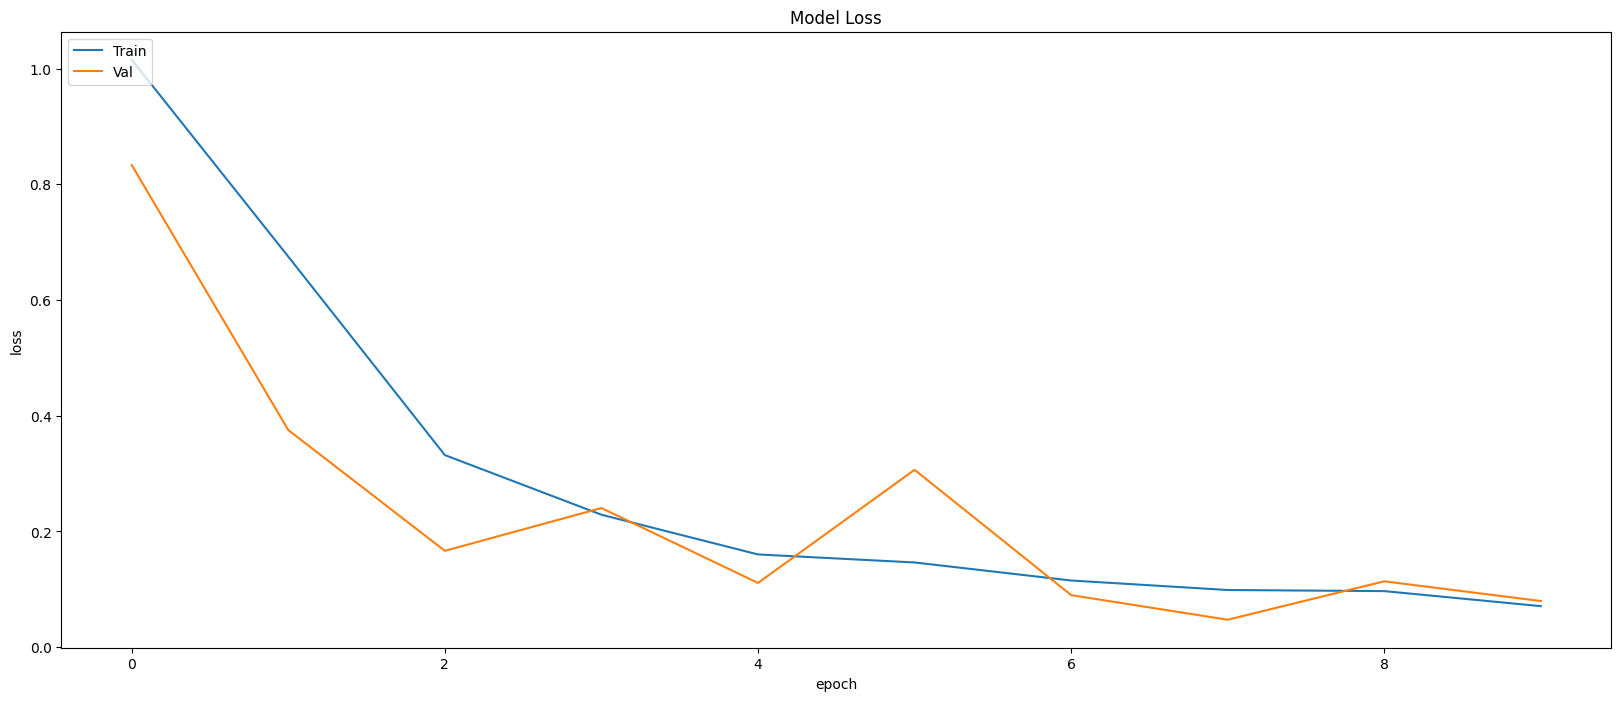

In [15]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

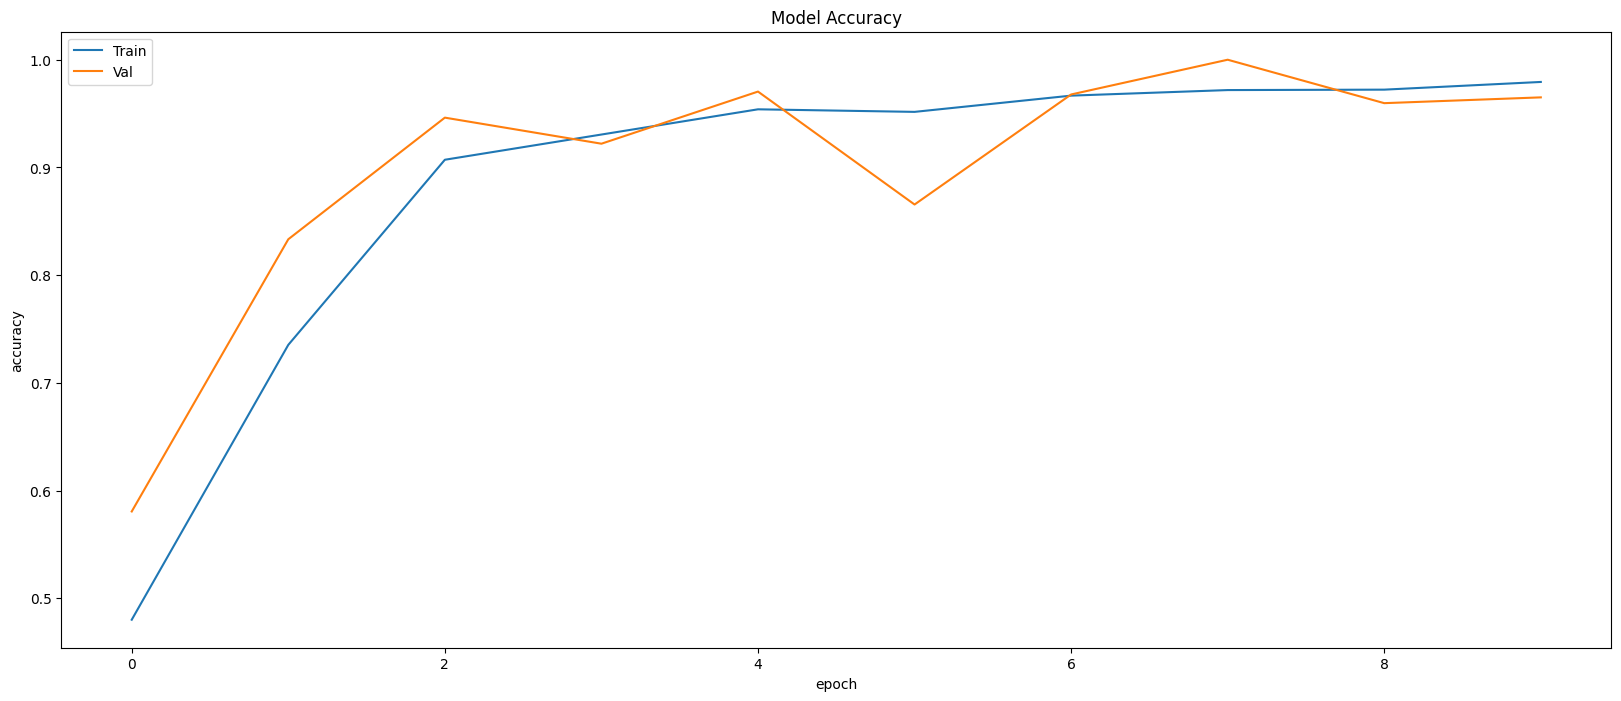

In [16]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [41]:
paper_img = os.listdir(data_ts_dir + '/paper')
paper_df = pd.DataFrame({'Image': paper_img})

rock_img = os.listdir(data_ts_dir + '/rock')
rock_df = pd.DataFrame({'Image': rock_img})

scissors_img = os.listdir(data_ts_dir + '/scissors')
scissors_df = pd.DataFrame({'Image': scissors_img})

test_df = pd.concat([paper_df, rock_df, scissors_df], axis=0, ignore_index=True  )
test_df.head()

,Image
0,testpaper01-00.png
1,testpaper01-01.png
2,testpaper01-02.png
3,testpaper01-07.png
4,testpaper01-04.png


In [22]:
len(test_df)

372

In [24]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(data_ts_dir,
                                                 shuffle=False,
                                                 batch_size=32,
                                                 target_size = (150, 150),
                                                 class_mode='categorical')

Found 372 images belonging to 3 classes.


In [26]:
predictions = cnn_model.predict(test_generator)

12/12 [==============================] - 2s 167ms/step


In [27]:
len(predictions)

372

In [42]:
test_df['Label'] = np.argmax(predictions, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(labels)
test_df.head()

,Image,Label
0,testpaper01-00.png,paper
1,testpaper01-01.png,paper
2,testpaper01-02.png,paper
3,testpaper01-07.png,paper
4,testpaper01-04.png,paper


In [43]:
test_df.Label.value_counts()

rock        137
scissors    124
paper       111
Name: Label, dtype: int64

In [47]:
true_pred = 0
for index in test_df.index:
    if(test_df['Label'][index] in test_df['Image'][index]):
        true_pred +=1

print(f"Accuracy of the model on test data is {round((true_pred/len(test_df))*100,2)}")

Accuracy of the model on test data is 96.51


In [50]:
y_test = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
values = list(labels.values())

print(classification_report(y_test,y_pred, target_names = values))

              precision    recall  f1-score   support

       paper       1.00      0.90      0.94       124
        rock       0.91      1.00      0.95       124
    scissors       1.00      1.00      1.00       124

    accuracy                           0.97       372
   macro avg       0.97      0.97      0.96       372
weighted avg       0.97      0.97      0.96       372



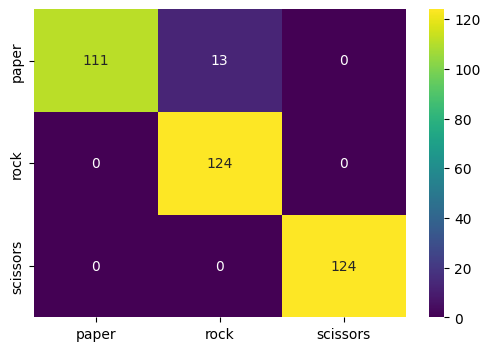

In [64]:
import seaborn as sns

values = list(labels.values())
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,
            fmt='.3g',
            xticklabels=values,
            yticklabels=values,
            cmap='viridis')
plt.show()